In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Old Data

In [2]:
sujets = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

with open('parametre/Delete/Delete_list_trials_velocity_fct.pkl', 'rb') as fichier :
    delete = pickle.load(fichier, encoding='latin1')
    
with open('parametre/Delete/Delete_list_Bad_trials_velocity.pkl', 'rb') as fichier :
    Bad = pickle.load(fichier, encoding='latin1')

covar_good = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}
covar_bad  = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}

chisqr_good = []
chisqr_bad  = []

for s in sujets :
    with open('parametre/fct_velocity/param_Fit_%s_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
                   
    for b in range(param['N_blocks']) :
        for t in range(param['N_trials']) :
            #print('\n',param['covar'][b][t])
            if  type(param['covar'][0][t])==list and type(param['covar'][b][t][1])==np.ndarray :
                
                chichi = param['goodness_of_fit']['chisqr'][b][t]
                if t in Bad[s][b] or t in delete[s][b] : chisqr_bad.append(chichi)
                else :                                   chisqr_good.append(chichi)
                for p in covar_good.keys() :
                    num_p = param['covar'][b][t][0].index(p)
                    covar_ = param['covar'][b][t][1][num_p][num_p]
                    
                    
                    if t in Bad[s][b] or t in delete[s][b] : covar_bad[p].append(covar_)
                    else :                                   covar_good[p].append(covar_)
                    
            else :
                print('Trial None', s, b, t, 'Bad' if t in Bad[s][b] or t in delete[s][b] else '')

Trial None OP 2 95 Bad
Trial None YK 0 84 Bad
Trial None YK 1 92 Bad
Trial None YK 2 40 Bad
Trial None YK 2 107 Bad


In [3]:
param['covar'][b][10]

[['steady_state', 'a_anti', 'latency', 'start_anti', 'tau'],
 array([[ 9.93721675e-02, -4.99516228e-02,  8.12248914e-09,
         -1.14626945e+01,  5.95096160e-01],
        [-4.99516228e-02, -1.16768368e+02, -3.82909414e-07,
         -8.54986274e+03,  1.48972470e+00],
        [ 8.12248914e-09, -3.82909414e-07,  1.51912957e-06,
         -4.17847848e-05, -6.32639091e-07],
        [-1.14626945e+01, -8.54986274e+03, -4.17847848e-05,
         -4.75644212e+05,  3.41855929e+02],
        [ 5.95096160e-01,  1.48972470e+00, -6.32639091e-07,
          3.41855929e+02,  5.48382306e+01]])]

In [4]:
param['covar'][b][10][1][3][3]

-475644.21248302225

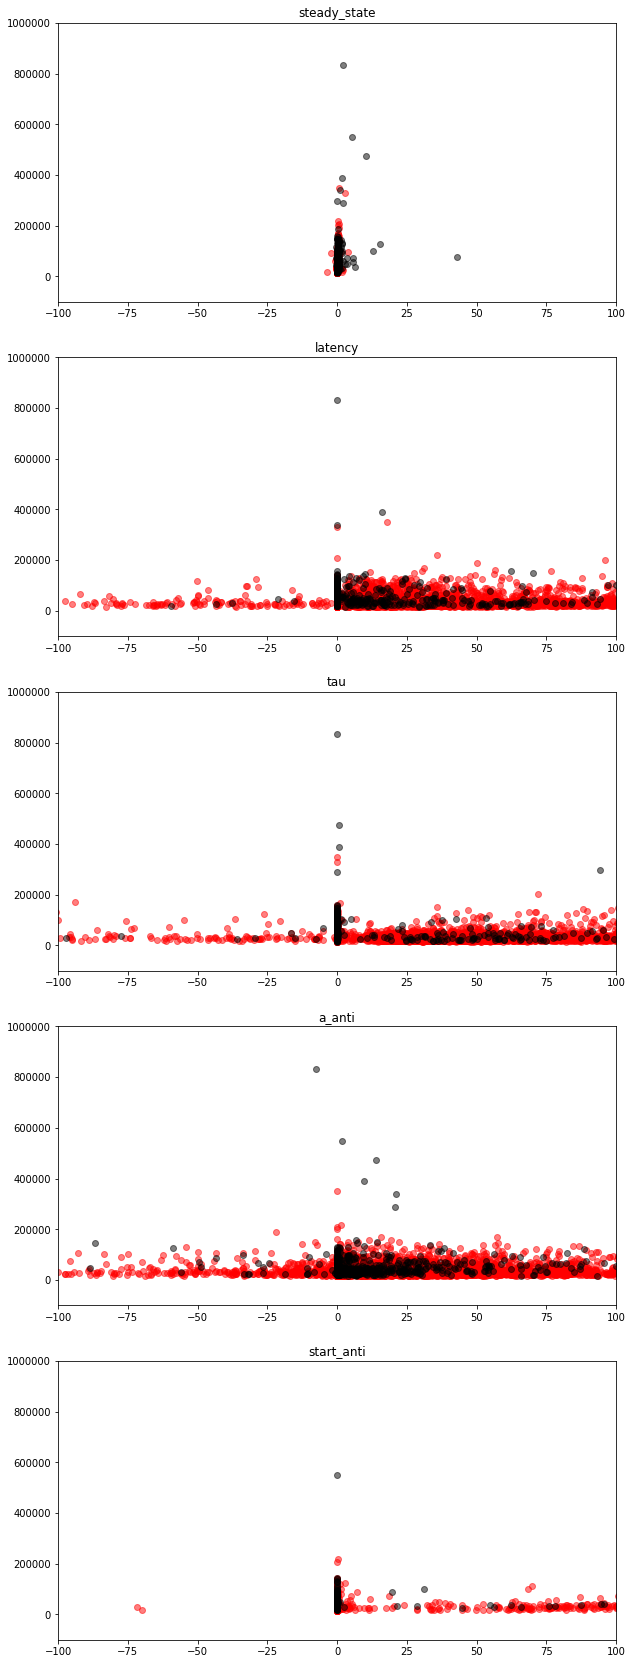

In [5]:
nb_param = len(covar_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(covar_good.keys()) :
    ax[num_p].scatter(covar_good[p], chisqr_good, c='r', alpha=.5)
    ax[num_p].scatter(covar_bad[p], chisqr_bad, c='k', alpha=.5)
    
    ax[num_p].set_title(p)
    ax[num_p].set_xlim(-100,100)
    ax[num_p].set_ylim(-1e5,1e6)

# New Data

In [6]:
covar_good = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}
covar_bad  = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}
chisqr_good = []
chisqr_bad  = []

sujet = np.arange(1, 20)
sujet = np.delete(sujet, 8)
sujet = np.delete(sujet, 12)

for s in [1, 2, 3, 4, 5] : #sujet :
    with open('parametre/new_data/fct_velocity/param_Fit_s%sBL50_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    f = open('data/new_data/s%sBL50_errors.txt'%s, 'r')
    delete = f.read()
    delete = [int(x) for x in delete if x!='\n']
    
    for t in range(len(delete)):#param['N_trials']) :
        if  type(param['covar'][0][t])==list and type(param['covar'][0][t][1])==np.ndarray :
            
            chichi = param['goodness_of_fit']['chisqr'][0][t]
            if delete[t] == 1 : chisqr_bad.append(chichi)
            else :              chisqr_good.append(chichi)
            
            for p in covar_good.keys() :
                num_p = param['covar'][0][t][0].index(p)
                covar_ = param['covar'][0][t][1][num_p][num_p]
                
                
                if delete[t] == 1 : covar_bad[p].append(covar_)
                else :              covar_good[p].append(covar_)
                
        else :
            print('Trial None', s, t, 'Bad' if delete[t]==1 else '')

Trial None 1 1 
Trial None 1 2 
Trial None 1 6 
Trial None 1 8 
Trial None 1 9 
Trial None 1 10 
Trial None 1 12 
Trial None 1 17 
Trial None 1 19 
Trial None 1 20 
Trial None 1 22 
Trial None 1 23 
Trial None 1 24 
Trial None 1 25 
Trial None 1 26 
Trial None 1 28 
Trial None 1 29 
Trial None 1 30 
Trial None 1 35 
Trial None 1 36 
Trial None 1 37 
Trial None 1 39 
Trial None 1 41 
Trial None 1 42 
Trial None 1 44 
Trial None 1 45 
Trial None 1 47 
Trial None 1 48 Bad
Trial None 1 50 
Trial None 1 52 
Trial None 1 54 
Trial None 1 55 
Trial None 1 56 
Trial None 1 57 
Trial None 1 58 
Trial None 1 61 
Trial None 1 67 
Trial None 1 68 
Trial None 1 69 
Trial None 1 72 Bad
Trial None 1 75 
Trial None 1 77 
Trial None 1 78 
Trial None 1 79 
Trial None 1 80 
Trial None 1 82 
Trial None 1 86 
Trial None 1 87 
Trial None 1 88 
Trial None 1 90 
Trial None 1 91 Bad
Trial None 1 92 
Trial None 1 93 
Trial None 1 94 
Trial None 1 101 
Trial None 1 102 
Trial None 1 104 
Trial None 1 106 
Trial 

Trial None 4 1 
Trial None 4 2 
Trial None 4 6 
Trial None 4 8 
Trial None 4 9 
Trial None 4 10 
Trial None 4 12 
Trial None 4 17 
Trial None 4 19 
Trial None 4 20 
Trial None 4 22 
Trial None 4 23 
Trial None 4 24 
Trial None 4 25 
Trial None 4 26 
Trial None 4 28 
Trial None 4 29 
Trial None 4 30 
Trial None 4 35 
Trial None 4 36 
Trial None 4 37 
Trial None 4 39 
Trial None 4 41 
Trial None 4 42 
Trial None 4 44 
Trial None 4 45 
Trial None 4 47 
Trial None 4 48 
Trial None 4 50 
Trial None 4 52 
Trial None 4 54 
Trial None 4 55 
Trial None 4 56 
Trial None 4 57 
Trial None 4 58 
Trial None 4 61 
Trial None 4 67 
Trial None 4 68 
Trial None 4 69 
Trial None 4 72 
Trial None 4 75 
Trial None 4 77 
Trial None 4 78 
Trial None 4 79 
Trial None 4 80 
Trial None 4 82 
Trial None 4 86 
Trial None 4 87 
Trial None 4 88 
Trial None 4 90 
Trial None 4 91 
Trial None 4 92 Bad
Trial None 4 93 
Trial None 4 94 
Trial None 4 101 
Trial None 4 102 
Trial None 4 104 
Trial None 4 106 
Trial None 4

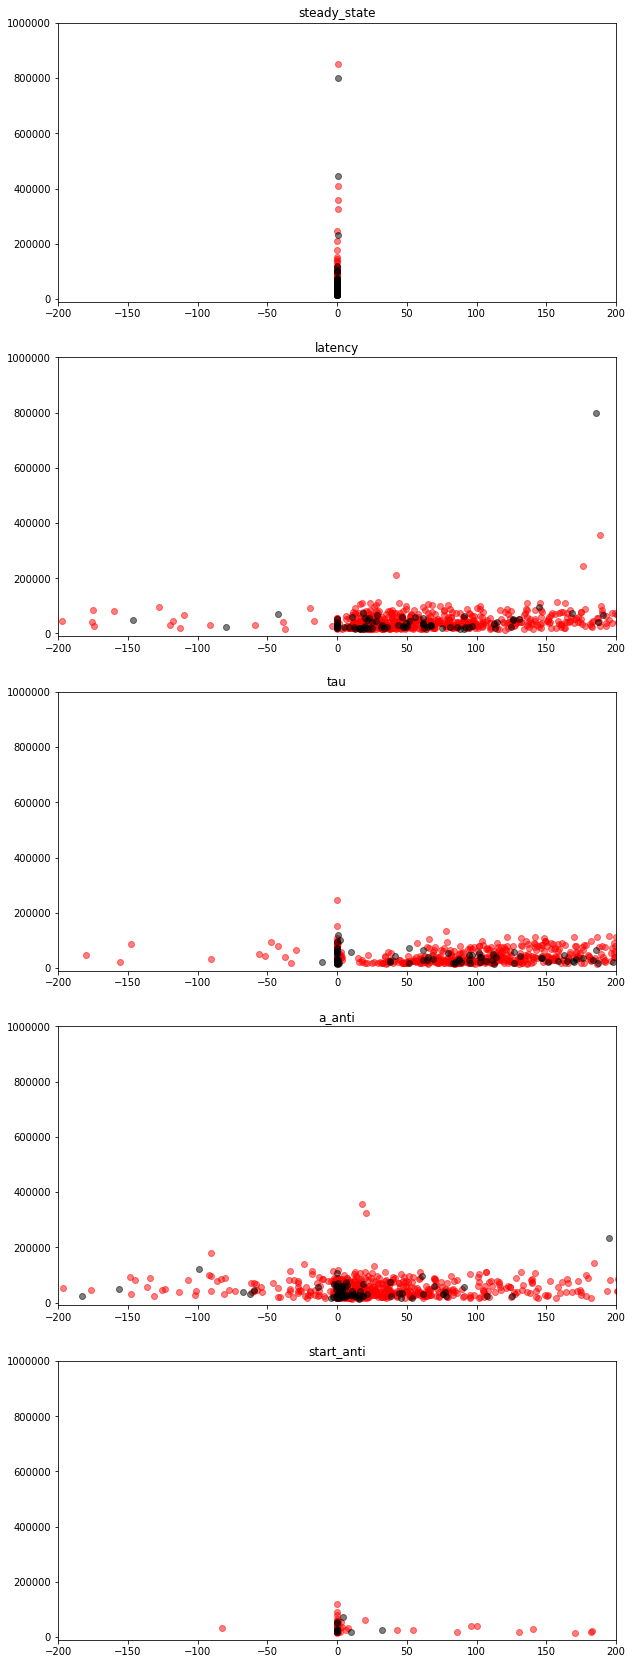

In [7]:
nb_param = len(covar_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(covar_good.keys()) :
    ax[num_p].scatter(covar_good[p], chisqr_good, c='r', alpha=.5)
    ax[num_p].scatter(covar_bad[p], chisqr_bad, c='k', alpha=.5)
    
    ax[num_p].set_title(p)
    ax[num_p].set_xlim(-200,200)
    ax[num_p].set_ylim(-1e4,1e6)